# Exploratory Data Analysis (EDA) – Theory and Concepts

## 1. Introduction
Exploratory Data Analysis (EDA) is the process of analyzing and summarizing datasets to understand their **main characteristics**, often using **visual methods**.  
EDA helps in:
- Detecting **outliers** and anomalies  
- Understanding **distributions** of variables  
- Identifying **relationships** between variables  
- Preparing the dataset for further **statistical modeling or machine learning**

---

## 2. Descriptive Statistics

### a. Measures of Central Tendency
These describe the **center or typical value** of a dataset:

- **Mean (Average)**: Sum of all values divided by count
\[
\text{Mean} = \frac{\sum x_i}{n}
\]

- **Trimmed Mean**: Mean calculated after removing a small percentage of extreme values (outliers).  
  Useful when data contains **extreme outliers**.

- **Weighted Mean**: Mean where each observation has a **weight**, e.g., credits for GPA.
\[
\text{Weighted Mean} = \frac{\sum w_i x_i}{\sum w_i}
\]

- **Median**: Middle value of sorted data. Not affected by outliers.

- **Mode**: Most frequently occurring value.

### b. Measures of Dispersion
These describe the **spread or variability** of data:

- **Range**: Difference between max and min  
- **Interquartile Range (IQR)**: Difference between 75th percentile (Q3) and 25th percentile (Q1)  
  - Used for **outlier detection**:
  \[
  \text{Lower Bound} = Q1 - 1.5 \times IQR
  \]
  \[
  \text{Upper Bound} = Q3 + 1.5 \times IQR
  \]

---

## 3. Outlier Detection
Outliers are **extreme values** that lie far from other observations.  

- **IQR Method**: Values outside [Lower Bound, Upper Bound] are considered outliers  
- Visual methods such as **Boxplots** are also used to detect outliers.

---

## 4. Data Visualization

### a. Boxplot
- Displays **median, quartiles, and outliers**  
- Useful to quickly see **distribution spread** and **extreme values**

### b. Histogram
- Shows the **frequency distribution** of a numeric variable  
- Can combine with **Density Plot (KDE)** to visualize **probability density**

### c. Bar Plot
- For **categorical data** or **binned numeric data**  
- Example: Age distribution in bins

### d. Scatter Plot
- Visualizes the relationship between **two numeric variables**  
- Helps identify **trends, correlations, or clusters**

### e. Hexagonal Binning Plot
- Useful for **large datasets** with overlapping points  
- Shows **density of points** in hexagonal bins

### f. Kernel Density Estimation (KDE) Plot
- Estimates the **probability density function** of a variable  
- Can be **1D or 2D (contour plot)**  
- Shows areas of **high and low concentration of data points**

### g. Heatmap
- Visualizes **correlation matrix** or **contingency tables**  
- Color intensity shows strength of correlation or frequency

### h. Violin Plot
- Combines **boxplot and KDE**  
- Shows **distribution shape, median, interquartile range, and density**  
- Can compare distributions across **categories**

---

## 5. Contingency Tables
- Used to **analyze relationship between two categorical variables**  
- Counts occurrences of each combination of categories
- Example:
\[
\text{Gender vs Passed Status}
\]

| Gender | Passed=0 | Passed=1 |
|--------|----------|----------|
| M      | 5        | 7        |
| F      | 3        | 5        |

- Can be visualized as a **heatmap** for better understanding

---

## 6. Correlation
- Measures **linear relationship** between numeric variables  
- Range: [-1, 1]  
  - **1** → perfect positive correlation  
  - **-1** → perfect negative correlation  
  - **0** → no correlation
- Heatmaps are commonly used to **visualize correlation matrices**

---

## 7. Random Data Generation
For testing and demonstration:

- **Random integers**: `np.random.randint(low, high, size)`  
- **Random floats**: `np.random.uniform(low, high, size)`  
- **Random choice for categorical or binary variables**: `np.random.choice([0,1], size=n)`  

Used to **simulate datasets** for EDA practice.

---

## 8. Summary of EDA Steps

1. Generate or load dataset  
2. Perform **descriptive statistics**:
   - Mean, median, mode, weighted statistics, trimmed mean
3. Detect **outliers** using IQR or boxplots  
4. Visualize distributions:
   - Histogram, density plots, boxplots, violin plots, bar charts
5. Analyze relationships:
   - Scatter plots, hexbin plots, KDE contour plots, correlation heatmap
6. Examine categorical relationships:
   - Contingency tables and heatmaps
7. Document insights and observations

---

This theory complements practical EDA workflow, including:
- **Weighted mean and median for GPA**
- **Outlier detection for Age**
- **Visualizations: histogram, boxplot, scatter, KDE, hexbin, violin**
- **Correlation analysis and contingency tables**


--- Descriptive Statistics ---
Mean GPA: 2.77
Trimmed Mean GPA (10%): 2.73
Weighted Mean GPA: 2.76
Weighted Median GPA: 2.65
Mode Age: 25


--- Outliers in AGE ---
No outliers detected. 



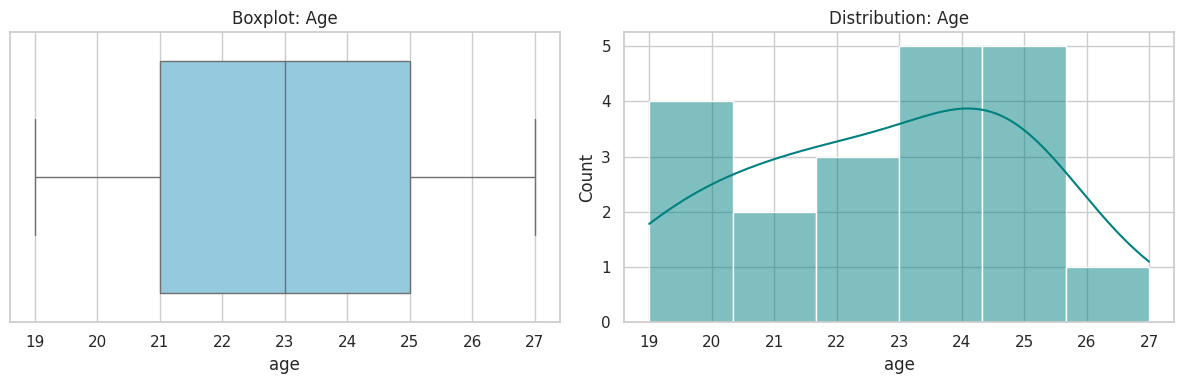

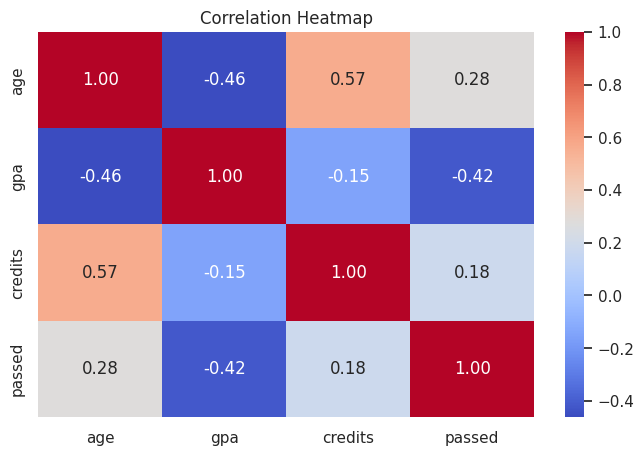

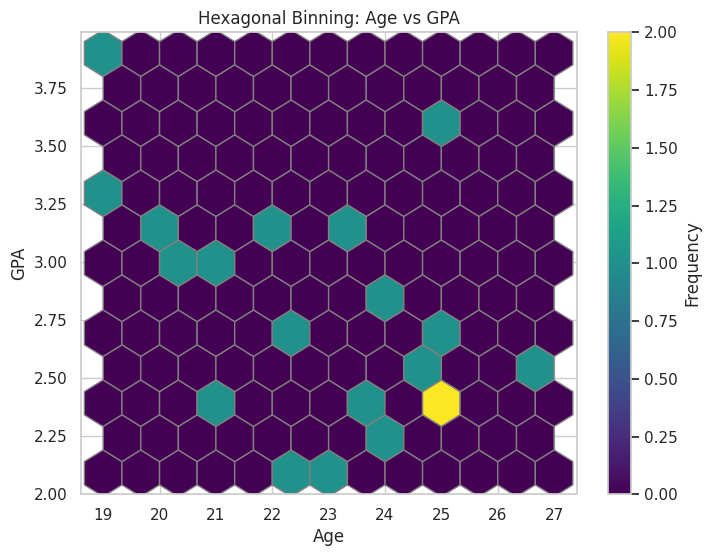

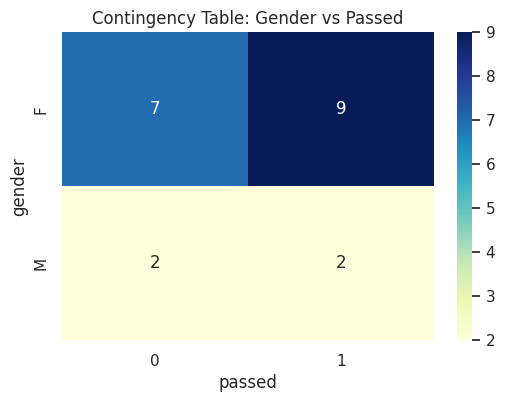

/tmp/ipykernel_220102/4285375514.py:116: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='gender', y='gpa', data=df, palette='pastel', inner='box')


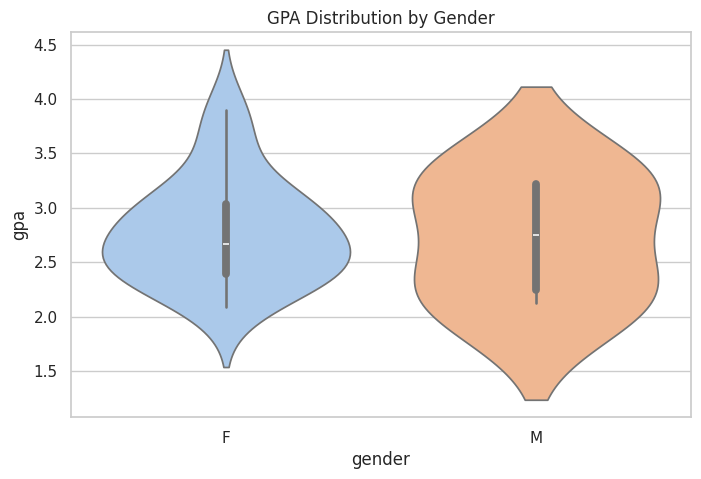

In [124]:

# LIBRARIES & CONFIGURATION
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import trim_mean
import statistics
import wquantiles

# Set visual style for plots
sns.set_theme(style="whitegrid")
%matplotlib inline 


# 1. DATA GENERATION

def generate_student_data(n=20, seed=42):
    """Generates a random dataset of student records."""
    np.random.seed(seed)
    
    data = {
        'name': [f'Student{i+1}' for i in range(n)],
        'age': np.random.randint(18, 28, size=n),
        'gpa': np.round(np.random.uniform(2.0, 4.0, size=n), 2),
        'credits': np.random.randint(14, 26, size=n),
        'gender': np.random.choice(['M', 'F'], size=n),
        'passed': np.random.choice([0, 1], size=n)
    }
    return pd.DataFrame(data)

# Initialize DataFrame
df = generate_student_data()

# 2. STATISTICAL ANALYSIS FUNCTIONS

def calculate_descriptive_stats(df):
    """Calculates means, trimmed means, and weighted metrics."""
    stats = {
        "Mean GPA": df['gpa'].mean(),
        "Trimmed Mean GPA (10%)": trim_mean(df['gpa'], 0.1),
        "Weighted Mean GPA": np.average(df['gpa'], weights=df['credits']),
        "Weighted Median GPA": wquantiles.median(df['gpa'], weights=df['credits']),
        "Mode Age": statistics.mode(df['age'])
    }
    
    print("--- Descriptive Statistics ---")
    for key, value in stats.items():
        print(f"{key}: {value:.2f}" if isinstance(value, float) else f"{key}: {value}")
    print("\n")

def detect_outliers_iqr(df, column):
    """Detects outliers using the Interquartile Range (IQR) method."""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"--- Outliers in {column.upper()} ---")
    print(outliers if not outliers.empty else "No outliers detected.", "\n")
    return lower_bound, upper_bound

# Run Analysis
calculate_descriptive_stats(df)
lower, upper = detect_outliers_iqr(df, 'age')


# 3. VISUALIZATION FUNCTIONS

def plot_univariate_analysis(df, col):
    """Generates Boxplot and Histogram for a single column."""
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Boxplot
    sns.boxplot(ax=axes[0], x=df[col], color='skyblue')
    axes[0].set_title(f'Boxplot: {col.capitalize()}')
    
    # Histogram + KDE
    sns.histplot(ax=axes[1],x=df[col], kde=True, color='teal')
    axes[1].set_title(f'Distribution: {col.capitalize()}')
    
    plt.tight_layout()
    plt.show()

def plot_multivariate_analysis(df):
    """Generates Correlation Heatmap and Hexbin plot."""
    # Correlation Heatmap
    numeric_df = df.select_dtypes(include=[np.number])
    plt.figure(figsize=(8, 5))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show()

    # Hexbin Plot
    plt.figure(figsize=(8, 6))
    plt.hexbin(df['age'], df['gpa'], gridsize=12, cmap='viridis', edgecolors='grey')
    plt.colorbar(label='Frequency')
    plt.xlabel('Age')
    plt.ylabel('GPA')
    plt.title('Hexagonal Binning: Age vs GPA')
    plt.show()

def plot_categorical_analysis(df):
    """Generates Contingency Heatmap and Violin Plot."""
    # Contingency Table
    ct = pd.crosstab(df['gender'], df['passed'])
    plt.figure(figsize=(6, 4))
    sns.heatmap(ct, annot=True, fmt="d", cmap="YlGnBu")
    plt.title("Contingency Table: Gender vs Passed")
    plt.show()

    # Violin Plot
    plt.figure(figsize=(8, 5))
    sns.violinplot(x='gender', y='gpa', data=df, palette='pastel', inner='box')
    plt.title("GPA Distribution by Gender")
    plt.show()

# Run Visualizations
plot_univariate_analysis(df, 'age')
plot_multivariate_analysis(df)
plot_categorical_analysis(df)